In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/svm-classification/UniversalBank.csv
/kaggle/input/svm-classification/SVM_Classification.R
/kaggle/input/svm-classification/Activity Sheet.docx


In [2]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
df = pd.read_csv('../input/svm-classification/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Check for null values in dataset
df.isnull().mean()*100

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [5]:
# Assigning X and y values for the dataset
X = df.loc[:,df.columns!='CreditCard']
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0


In [6]:
y = df['CreditCard']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

In [7]:
# Splitting Train and Test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM (Support Vector Machine)

In [9]:
# import svc
from sklearn.svm import SVC

# Creating a instance
classifier = SVC(kernel='rbf',random_state=None)

# Fitting the model
classifier.fit(X_train, y_train)

SVC()

In [10]:
classifier.intercept_

array([-0.52729875])

In [11]:
classifier.n_support_

array([1313,  947], dtype=int32)

In [12]:
classifier.support_vectors_

array([[-1.33287451,  0.30986962,  0.41774853, ...,  2.93970633,
         3.84262485, -1.22183366],
       [-0.42943771,  0.48384198,  0.33076936, ..., -0.34017003,
        -0.26023878,  0.81844201],
       [-1.33771311,  0.48384198,  0.59170687, ..., -0.34017003,
        -0.26023878,  0.81844201],
       ...,
       [ 0.6647784 ,  1.52767614,  1.46149858, ..., -0.34017003,
        -0.26023878,  0.81844201],
       [-0.10386867,  0.48384198,  0.41774853, ..., -0.34017003,
        -0.26023878,  0.81844201],
       [-0.52966597, -1.77779868, -1.75673073, ..., -0.34017003,
        -0.26023878,  0.81844201]])

In [13]:
# Predicting the values
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[2437   18]
 [ 872  173]]
[[1067    8]
 [ 368   57]]


In [15]:
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)

0.7457142857142857


In [16]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.7493333333333333


**The accuracies for both train and test models are approx same**

In [17]:
# Correlation
c = df.corr()
print(c)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

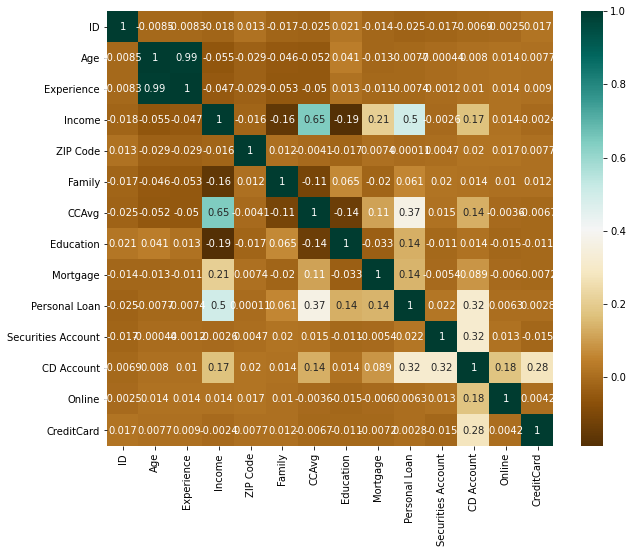

In [18]:
# Heat map
plt.figure(figsize=(10,8))
sns.heatmap(c,cmap='BrBG',annot=True)

# Data Visualization

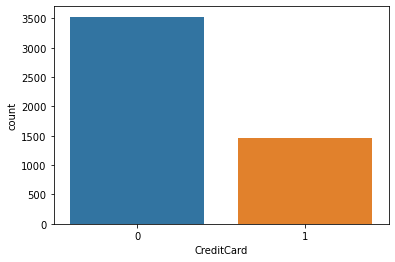

In [19]:
# Creditcard count
sns.countplot(df['CreditCard'])

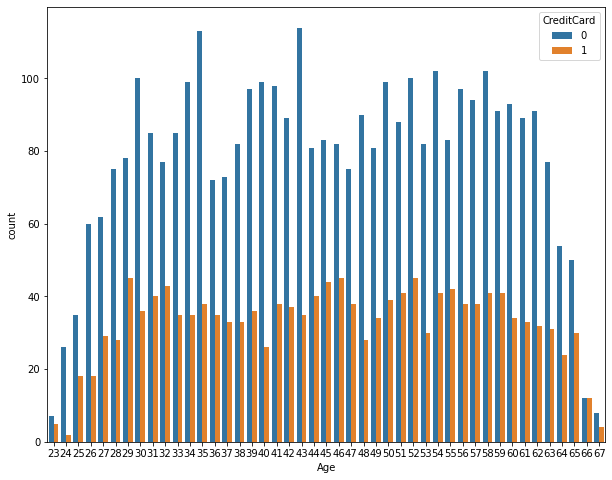

In [20]:
# Credit card issue according to age
plt.figure(figsize=(10,8))
sns.countplot(df['Age'],hue=df['CreditCard'])

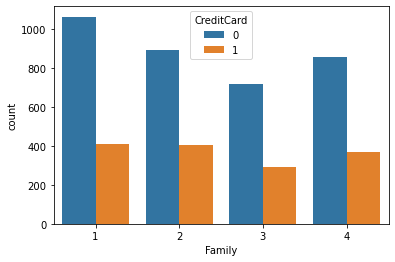

In [21]:
# Credit card issue according to Family members
sns.countplot(df['Family'],hue=df['CreditCard'])

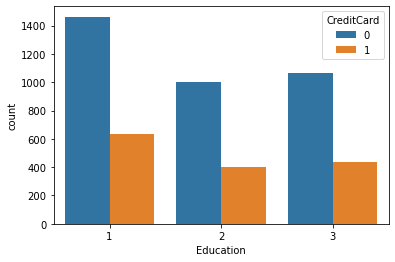

In [22]:
# Credit card issue according to Education
sns.countplot(df['Education'],hue=df['CreditCard'])

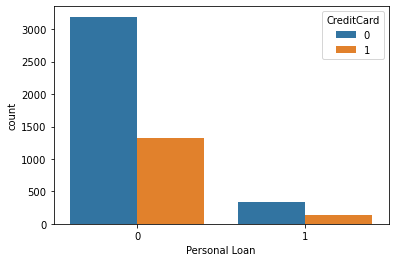

In [23]:
# Credit card issue according to customer's Personal Loan
sns.countplot(df['Personal Loan'],hue=df['CreditCard'])

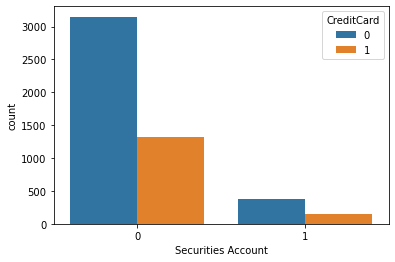

In [24]:
# Credit card issue according to customer's Securities Account
sns.countplot(df['Securities Account'],hue=df['CreditCard'])

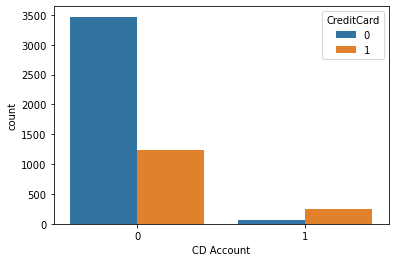

In [25]:
# Credit card issue according to customer's CD Account
sns.countplot(df['CD Account'],hue=df['CreditCard'])